In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from mpl_toolkits.basemap import Basemap

C:\Users\AB\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
new_df=pd.read_csv('https://raw.githubusercontent.com/naashonomics/covid19_data_hacks/master/clean_corona.csv', error_bad_lines=False)
new_df

,age,sex,city,province,country,whuan_or_not,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhantravel_history_dates,Wuhan_connect
0,30,male,Chaohu City: Hefei City,Anhui,China,1,31.64696,117.7166,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020
1,47,male,Baohe District: Hefei City,Anhui,China,1,31.77863,117.3319,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020
2,49,male,High-Tech Zone: Hefei City,Anhui,China,1,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020
3,47,female,High-Tech Zone: Hefei City,Anhui,China,1,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN
4,50,female,Feidong County: Hefei City,Anhui,China,1,32.00123,117.5681,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,22,male,Brisbane,Queensland,Australia,1.0,-27.4678,153.0281,point,NaN,NaN,10.03.2020,NaN,NaN,NaN
3866,40,NaN,NaN,NaN,Panama,1.0,8.514317,-80.1092,admin0,NaN,NaN,09.03.2020,NaN,NaN,NaN
3867,73,female,Buzau,NaN,Romania,1.0,45.166667,26.816667,point,NaN,NaN,09.03.2020,fever: nausea: digestive discomfort,NaN,- 02.03.2020
3868,60,male,Bucharest,NaN,Romania,1.0,44.4325,26.103889,point,NaN,NaN,09.03.2020,aggressive pulmonary symptomatology,NaN,NaN


In [3]:
new_df['latitude'].isnull().sum()

0

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

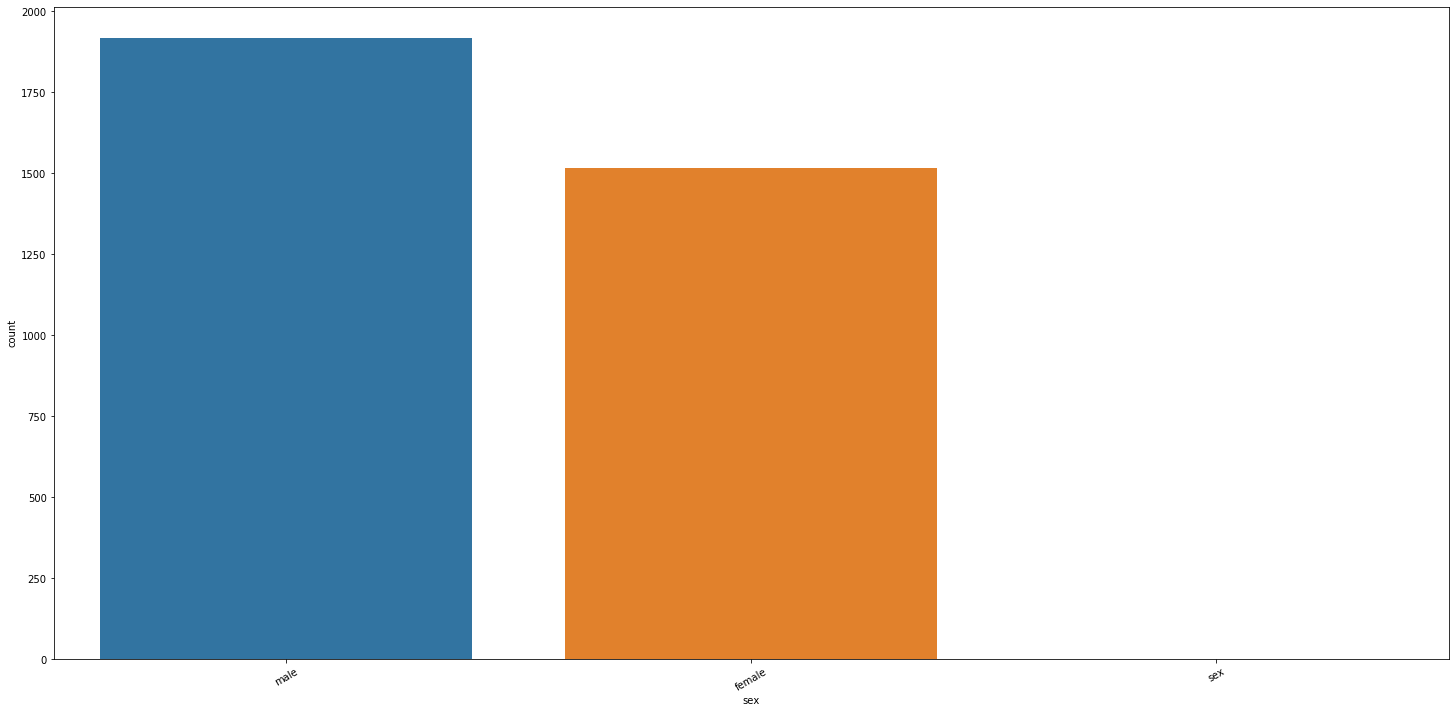

In [4]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'sex', data = new_df)
plt.xticks(rotation = 30)

In [5]:
new_df.dtypes

age                                   object
sex                                   object
city                                  object
province                              object
country                               object
whuan_or_not                          object
latitude                              object
longitude                             object
geo_resolution                        object
date_onset_symptoms                   object
date_admission_hospital               object
date_confirmation                     object
symptoms                              object
lives_in_Wuhantravel_history_dates    object
Wuhan_connect                         object
dtype: object

In [6]:
for i in range(0,len(new_df)):      
    if '-' in new_df['age'][i]:
        new_df['age'][i] = new_df['age'][i][-2:]   #range 40-49 is considered 49

In [7]:
#df['age'] = df.age.convert_objects(convert_numeric=True)

new_df['age'] = pd.to_numeric(new_df.age, errors='coerce')  # this will convert the Oct, August to NaN


In [8]:
df2=new_df.dropna(subset=['age'])

In [9]:
df2['age']=df2['age'].astype('int64')
df2

C:\Users\AB\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,sex,city,province,country,whuan_or_not,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhantravel_history_dates,Wuhan_connect
0,30,male,Chaohu City: Hefei City,Anhui,China,1,31.64696,117.7166,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020
1,47,male,Baohe District: Hefei City,Anhui,China,1,31.77863,117.3319,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020
2,49,male,High-Tech Zone: Hefei City,Anhui,China,1,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020
3,47,female,High-Tech Zone: Hefei City,Anhui,China,1,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN
4,50,female,Feidong County: Hefei City,Anhui,China,1,32.00123,117.5681,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,22,male,Brisbane,Queensland,Australia,1.0,-27.4678,153.0281,point,NaN,NaN,10.03.2020,NaN,NaN,NaN
3866,40,NaN,NaN,NaN,Panama,1.0,8.514317,-80.1092,admin0,NaN,NaN,09.03.2020,NaN,NaN,NaN
3867,73,female,Buzau,NaN,Romania,1.0,45.166667,26.816667,point,NaN,NaN,09.03.2020,fever: nausea: digestive discomfort,NaN,- 02.03.2020
3868,60,male,Bucharest,NaN,Romania,1.0,44.4325,26.103889,point,NaN,NaN,09.03.2020,aggressive pulmonary symptomatology,NaN,NaN


In [10]:
df2['age group'] = pd.cut(x=new_df['age'], bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99], labels=['Toddlers','Teens','20s', '30s', '40s','50s','60s','70s','80s','90s'])

C:\Users\AB\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df2['generation'] = pd.cut(x=new_df['age'], bins=[0, 19, 39, 59, 79, 99], labels=['Young Adults','Adults','Mid-Aged', 'Old', 'Very Old'])

df2

C:\Users\AB\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,sex,city,province,country,whuan_or_not,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhantravel_history_dates,Wuhan_connect,age group,generation
0,30,male,Chaohu City: Hefei City,Anhui,China,1,31.64696,117.7166,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,30s,Adults
1,47,male,Baohe District: Hefei City,Anhui,China,1,31.77863,117.3319,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,40s,Mid-Aged
2,49,male,High-Tech Zone: Hefei City,Anhui,China,1,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,40s,Mid-Aged
3,47,female,High-Tech Zone: Hefei City,Anhui,China,1,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,40s,Mid-Aged
4,50,female,Feidong County: Hefei City,Anhui,China,1,32.00123,117.5681,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,50s,Mid-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,22,male,Brisbane,Queensland,Australia,1.0,-27.4678,153.0281,point,NaN,NaN,10.03.2020,NaN,NaN,NaN,20s,Adults
3866,40,NaN,NaN,NaN,Panama,1.0,8.514317,-80.1092,admin0,NaN,NaN,09.03.2020,NaN,NaN,NaN,40s,Mid-Aged
3867,73,female,Buzau,NaN,Romania,1.0,45.166667,26.816667,point,NaN,NaN,09.03.2020,fever: nausea: digestive discomfort,NaN,- 02.03.2020,70s,Old
3868,60,male,Bucharest,NaN,Romania,1.0,44.4325,26.103889,point,NaN,NaN,09.03.2020,aggressive pulmonary symptomatology,NaN,NaN,60s,Old


In [12]:
df2['age group'] = pd.cut(x=df2['age'], bins=[0, 49, 99], labels=['Below 50', 'Above 50'])

C:\Users\AB\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df2

,age,sex,city,province,country,whuan_or_not,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhantravel_history_dates,Wuhan_connect,age group,generation
0,30,male,Chaohu City: Hefei City,Anhui,China,1,31.64696,117.7166,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Below 50,Adults
1,47,male,Baohe District: Hefei City,Anhui,China,1,31.77863,117.3319,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,Below 50,Mid-Aged
2,49,male,High-Tech Zone: Hefei City,Anhui,China,1,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,Below 50,Mid-Aged
3,47,female,High-Tech Zone: Hefei City,Anhui,China,1,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,Below 50,Mid-Aged
4,50,female,Feidong County: Hefei City,Anhui,China,1,32.00123,117.5681,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,Above 50,Mid-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,22,male,Brisbane,Queensland,Australia,1.0,-27.4678,153.0281,point,NaN,NaN,10.03.2020,NaN,NaN,NaN,Below 50,Adults
3866,40,NaN,NaN,NaN,Panama,1.0,8.514317,-80.1092,admin0,NaN,NaN,09.03.2020,NaN,NaN,NaN,Below 50,Mid-Aged
3867,73,female,Buzau,NaN,Romania,1.0,45.166667,26.816667,point,NaN,NaN,09.03.2020,fever: nausea: digestive discomfort,NaN,- 02.03.2020,Above 50,Old
3868,60,male,Bucharest,NaN,Romania,1.0,44.4325,26.103889,point,NaN,NaN,09.03.2020,aggressive pulmonary symptomatology,NaN,NaN,Above 50,Old


In [14]:
import descartes

In [15]:
import geopandas as gpd
from shapely.geometry import Point,Polygon
%matplotlib inline

In [16]:
zipfile = "zip:///Users/AB/Desktop/Data Science competition/Countries_WGS84.zip"
countries = gpd.read_file(zipfile)

In [17]:
countries

,OBJECTID,CNTRY_NAME,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."
...,...,...,...
246,247,Western Samoa,"MULTIPOLYGON (((-172.59650 -13.50911, -172.551..."
247,248,Swaziland,"POLYGON ((30.89944 -26.77195, 30.88028 -26.793..."
248,249,Yemen,"MULTIPOLYGON (((48.68639 14.03750, 48.61000 14..."
249,250,Zambia,"POLYGON ((30.21302 -14.98172, 30.21917 -15.096..."


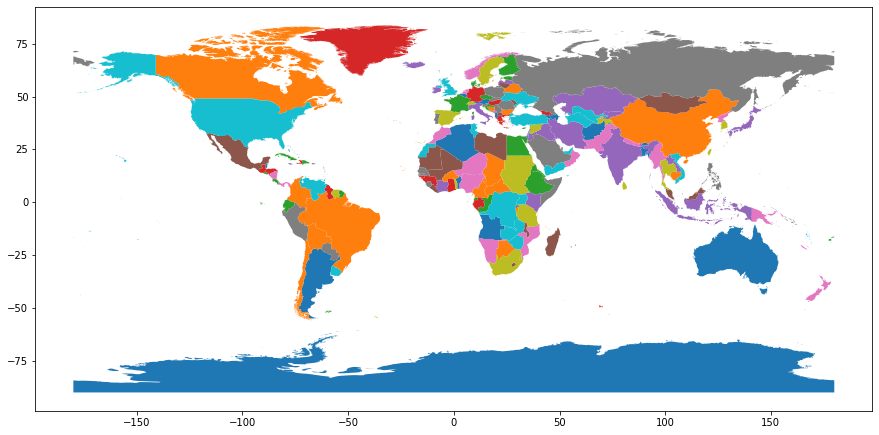

In [18]:
fig,ax=plt.subplots(figsize=(15,15))
countries.plot(column='CNTRY_NAME',ax=ax)

In [19]:
zipfile = "zip:///Users/AB/Desktop/Data Science competition/Countries_WGS84.zip"
countries = gpd.read_file(zipfile)

In [20]:
df2['latitude'] = pd.to_numeric(df2.latitude, errors='coerce') 
df2['longitude'] = pd.to_numeric(df2.longitude, errors='coerce') 
df2

C:\Users\AB\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\AB\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,sex,city,province,country,whuan_or_not,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhantravel_history_dates,Wuhan_connect,age group,generation
0,30,male,Chaohu City: Hefei City,Anhui,China,1,31.646960,117.716600,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Below 50,Adults
1,47,male,Baohe District: Hefei City,Anhui,China,1,31.778630,117.331900,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,Below 50,Mid-Aged
2,49,male,High-Tech Zone: Hefei City,Anhui,China,1,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,Below 50,Mid-Aged
3,47,female,High-Tech Zone: Hefei City,Anhui,China,1,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,Below 50,Mid-Aged
4,50,female,Feidong County: Hefei City,Anhui,China,1,32.001230,117.568100,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,Above 50,Mid-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,22,male,Brisbane,Queensland,Australia,1.0,-27.467800,153.028100,point,NaN,NaN,10.03.2020,NaN,NaN,NaN,Below 50,Adults
3866,40,NaN,NaN,NaN,Panama,1.0,8.514317,-80.109200,admin0,NaN,NaN,09.03.2020,NaN,NaN,NaN,Below 50,Mid-Aged
3867,73,female,Buzau,NaN,Romania,1.0,45.166667,26.816667,point,NaN,NaN,09.03.2020,fever: nausea: digestive discomfort,NaN,- 02.03.2020,Above 50,Old
3868,60,male,Bucharest,NaN,Romania,1.0,44.432500,26.103889,point,NaN,NaN,09.03.2020,aggressive pulmonary symptomatology,NaN,NaN,Above 50,Old


In [21]:
import json
#Read data to json.
jsonfile = json.loads(df2.to_json())
#Convert to String like object.
json_data = json.dumps(jsonfile)

In [22]:
from bokeh.io import output_notebook,output_file
from bokeh.plotting import figure,show
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.models import ColumnDataSource, Grid, LinearAxis, Patches, Plot
from bokeh.palettes import brewer

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40)

#Define custom tick labels for color bar.
tick_labels = {'Very Old': '10%', 'Old': '20%', 'Mid-Aged':'30%', 'Adults':'40%', 'Young Adults':'>40%'}

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Different generations infected with coronavirus', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'generation', 'transform' : color_mapper}, line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
#p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
#output_file('first_glyphs.html', title='First Glyphs')


GlyphRenderer(id='1039', ...)

In [23]:
#Display figure.
show(p)

In [24]:
df2.to_csv("age_location_cleaned.csv",index=False)

In [25]:
df2=pd.read_csv('./age_location_cleaned.csv')

In [26]:
crs={'init': 'epsg:4326'}
df2.head()

,age,sex,city,province,country,whuan_or_not,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhantravel_history_dates,Wuhan_connect,age group,generation
0,30,male,Chaohu City: Hefei City,Anhui,China,1.0,31.646960,117.716600,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Below 50,Adults
1,47,male,Baohe District: Hefei City,Anhui,China,1.0,31.778630,117.331900,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,Below 50,Mid-Aged
2,49,male,High-Tech Zone: Hefei City,Anhui,China,1.0,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,Below 50,Mid-Aged
3,47,female,High-Tech Zone: Hefei City,Anhui,China,1.0,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,Below 50,Mid-Aged
4,50,female,Feidong County: Hefei City,Anhui,China,1.0,32.001230,117.568100,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,Above 50,Mid-Aged


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3857 entries, 0 to 3856
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 3857 non-null   int64  
 1   sex                                 3431 non-null   object 
 2   city                                3316 non-null   object 
 3   province                            3355 non-null   object 
 4   country                             3814 non-null   object 
 5   whuan_or_not                        3857 non-null   float64
 6   latitude                            3857 non-null   float64
 7   longitude                           3857 non-null   float64
 8   geo_resolution                      3856 non-null   object 
 9   date_onset_symptoms                 1578 non-null   object 
 10  date_admission_hospital             1520 non-null   object 
 11  date_confirmation                   3837 no

In [28]:
geometry=[Point(xy) for xy in zip(df2["longitude"], df2["latitude"])]
geometry[:3]

In [29]:
geo_df = gpd.GeoDataFrame(df2, crs=crs, geometry=geometry)
geo_df.head()

,age,sex,city,province,country,whuan_or_not,latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhantravel_history_dates,Wuhan_connect,age group,generation,geometry
0,30,male,Chaohu City: Hefei City,Anhui,China,1.0,31.646960,117.716600,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Below 50,Adults,POINT (117.71660 31.64696)
1,47,male,Baohe District: Hefei City,Anhui,China,1.0,31.778630,117.331900,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,Below 50,Mid-Aged,POINT (117.33190 31.77863)
2,49,male,High-Tech Zone: Hefei City,Anhui,China,1.0,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,Below 50,Mid-Aged,POINT (117.22484 31.82831)
3,47,female,High-Tech Zone: Hefei City,Anhui,China,1.0,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,Below 50,Mid-Aged,POINT (117.22484 31.82831)
4,50,female,Feidong County: Hefei City,Anhui,China,1.0,32.001230,117.568100,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,Above 50,Mid-Aged,POINT (117.56810 32.00123)


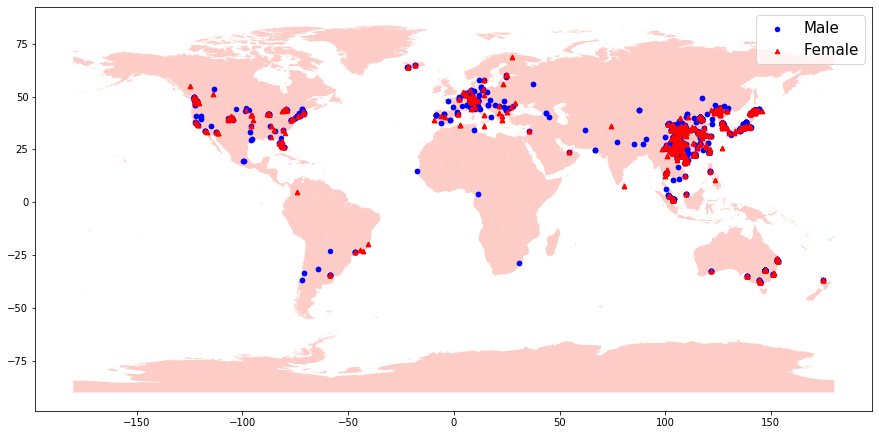

In [30]:
fig,ax=plt.subplots(figsize=(15,15))
countries.plot(ax=ax,alpha=0.4,color="salmon")
geo_df[geo_df['sex']=="male"].plot(ax=ax,markersize=20,color="blue",marker="o",label="Male")
geo_df[geo_df['sex']=="female"].plot(ax=ax,markersize=20,color="red",marker="^",label="Female")
plt.legend(prop={'size':15})

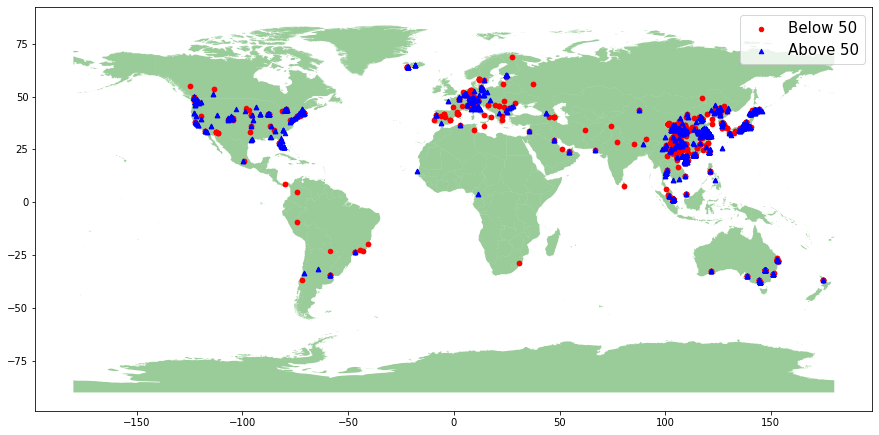

In [31]:
fig,ax=plt.subplots(figsize=(15,15))
countries.plot(ax=ax,alpha=0.4,color="green")
geo_df[geo_df['age group']=="Below 50"].plot(ax=ax,markersize=20,color="red",marker="o",label="Below 50")
geo_df[geo_df['age group']=="Above 50"].plot(ax=ax,markersize=20,color="blue",marker="^",label="Above 50")
plt.legend(prop={'size':15})

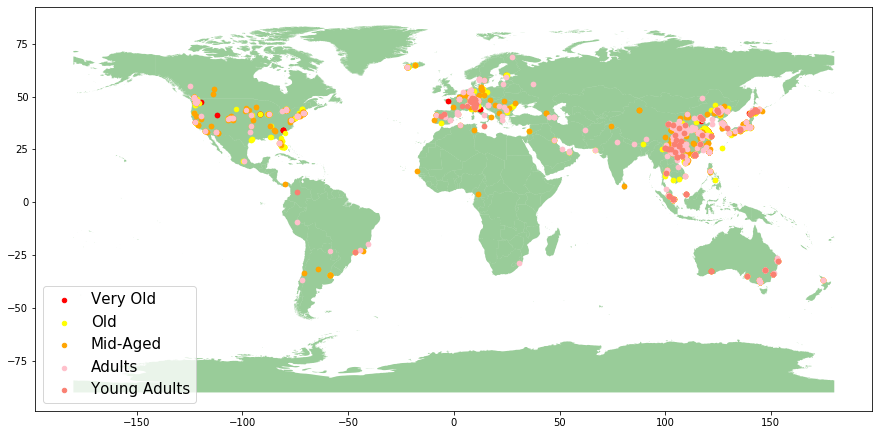

In [32]:
fig,ax=plt.subplots(figsize=(15,15))
countries.plot(ax=ax,alpha=0.4,color="green")
geo_df[geo_df['generation']=="Very Old"].plot(ax=ax,markersize=20,color="red",label="Very Old")
geo_df[geo_df['generation']=="Old"].plot(ax=ax,markersize=20,color="yellow",label="Old")
geo_df[geo_df['generation']=="Mid-Aged"].plot(ax=ax,markersize=20,color="orange",label="Mid-Aged")
geo_df[geo_df['generation']=="Adults"].plot(ax=ax,markersize=20,color="pink",label="Adults")
geo_df[geo_df['generation']=="Young Adults"].plot(ax=ax,markersize=20,color="salmon",label="Young Adults")
plt.legend(prop={'size':15})